# DATA WRANGLING ON AMES HOUSING PRICES
 
In this notebook we observe the data and datatypes. We also look at the Nan values and Outliers and how to deal with it.

In [1]:
# Imports and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
train=pd.read_csv('E:\\TANU\\datasets\\housing price\\train.csv')

## Observation

A first look of the data sample..

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can get a glance of the data and note the following:
1. Column names and their dtypes.
2. There are numeric values and categorical values.

In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are 1460 observations. There are variables of int,float and object dtypes.

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The following observations can be made:
1. Mean of target variable, SalePrice is 180921.
2. Median of target variable, SalePrice is 163000. So without looking at a histogram we can say that it is right-skewed.
3. Considering that the 75th observation is 214000, the maximum SalePrice 755000 is abnormally high and an outlier.
4. These observations can be made with other variables as well.
5. Potential outliers are there in data..eg. LotArea has a unusually high value of 215245, which has pushed its mean up. We need to further check this variable. Same is te case with MiscVal.
6. There are many 0 values in some columns.

In [6]:
train[(train['LotArea']>11601)&(train['LotArea']<=215245)]['LotArea'].sort_values(ascending =False).head(20)

313     215245
335     164660
249     159000
706     115149
451      70761
1298     63887
1396     57200
769      53504
457      53227
384      53107
53       50271
661      46589
848      45600
523      40094
271      39104
1287     36500
1169     35760
1184     35133
411      34650
529      32668
Name: LotArea, dtype: int64

In LotArea, as seen above, there are many high values. This does not look like an error, though it can be an outlier.

In [7]:
train['MiscVal'].sort_values(ascending =False).head(20)

346     15500
1230     8300
705      3500
1457     2500
890      2000
1386     2000
510      2000
539      2000
1171     1400
767      1300
392      1200
786      1200
1328     1150
439       800
84        700
1083      700
5         700
335       700
16        700
912       620
Name: MiscVal, dtype: int64

In MiscVal, these top 2 values seem to be outiers. 

## Classifying dtypes

We classify data types into 2 classes i.e numeric and categoric. We also need to identify ordinal variables and decide which class we can place them in.

In [8]:
# Creating list for numeric values.
from pandas.api.types import is_numeric_dtype
numcollist=[col for col in train.drop('Id', axis=1).columns if is_numeric_dtype(train[col]) ]

In [9]:
for col in numcollist:
    print(col, train[col].nunique())

MSSubClass 15
LotFrontage 110
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
MasVnrArea 327
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageYrBlt 97
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SalePrice 663


So as seen above, there are unique values far less than the number of observations. These are ordinal variables.There is no point in doing any numeric calculations with them so we place all variables with categories less than 16 to ordinal list. In this list we will also include the columns that represent year.

In [10]:
# Creating list for ordinal and categorical variables
ordlist=[col for col in numcollist if train[col].nunique() < 16 ]
ordlist.append('YearBuilt')
ordlist.append('YearRemodAdd')
ordlist.append('GarageYrBlt')
for col in ordlist:
    numcollist.remove(col)
categlist=[col for col in train.drop('Id', axis=1).columns if not is_numeric_dtype(train[col])]




## Missing Values

In [11]:
### Missing values of categorical variables

In [12]:
train[categlist].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

For the Nan values we create a seperate category 'Absent'.This would help to capture any new information such as average Sale Price in case a feature is absent. Variables like PoolQC, Fence, MiscFeature and Alley have a very high Nan. These may not be useful at all. However, we cannot make similar assumptions about population data. So we retain them for whatever little information they may provide.

In [13]:
#Imputing Nan
train[categlist]=train[categlist].fillna('Absent')

A further look into the categories..

In [14]:
for col in categlist:
    print(col, train[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley ['Absent' 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'Met

There are some None values in MasVnrType which needs to be replaced.

In [15]:
train['MasVnrType'].replace({'None':'Absent'}, inplace=True)

In [16]:
#We add the ordinal list to categorical list
categlist=categlist+ ordlist

### Missing values and zero values: Numeric columns

In [17]:
# Missing values
train[numcollist].isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
MiscVal            0
SalePrice          0
dtype: int64

In [18]:
#zero values
for col in numcollist:
    print(col,train[train[col]==0][col].count())

    

LotFrontage 0
LotArea 0
MasVnrArea 861
BsmtFinSF1 467
BsmtFinSF2 1293
BsmtUnfSF 118
TotalBsmtSF 37
1stFlrSF 0
2ndFlrSF 829
LowQualFinSF 1434
GrLivArea 0
GarageArea 81
WoodDeckSF 761
OpenPorchSF 656
EnclosedPorch 1252
3SsnPorch 1436
ScreenPorch 1344
MiscVal 1408
SalePrice 0


More than the problem of Nan, we have a problem of zero values. This could mean that a feature is not present. Let us take a look at the impact of a numerical feature being absent, on 'SalePrice' variable by plotting the histogram of 'Saleprice'. We are doing this so that we can understand the impact of zero values on our target variable.

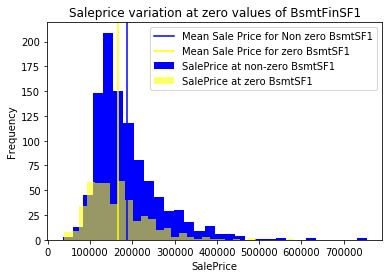

In [19]:
#Histogram of SalePrice to see impact of zero values in 'BsmtSF1'
train[train['BsmtFinSF1']!=0]['SalePrice'].plot.hist( bins=30, color= 'blue', label='SalePrice at non-zero BsmtSF1')
plt.axvline(train[train['BsmtFinSF1']!=0]['SalePrice'].mean(),color= 'blue', label='Mean Sale Price for Non zero BsmtSF1')
train[train['BsmtFinSF1']==0]['SalePrice'].plot.hist( bins=30, color='yellow',alpha=.6, label='SalePrice at zero BsmtSF1')
plt.axvline(train[train['BsmtFinSF1']==0]['SalePrice'].mean(),color= 'yellow', label='Mean Sale Price for zero BsmtSF1')
plt.xlabel('SalePrice')
plt.title('Saleprice variation at zero values of BsmtFinSF1')
plt.legend()

Average 'SalePrice' is lesser where BsmtFinSF1 is not present

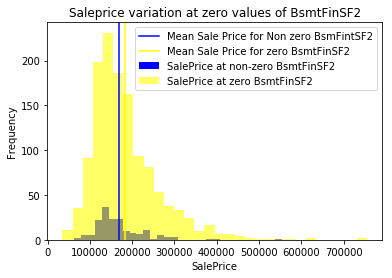

In [20]:
#Histogram of SalePrice to see impact of zero values in 'BsmtFinSF2'
train[train['BsmtFinSF2']!=0]['SalePrice'].plot.hist( bins=30, color= 'blue',label='SalePrice at non-zero BsmtFinSF2')
plt.axvline(train[train['BsmtFinSF2']!=0]['SalePrice'].mean(),color= 'blue', label='Mean Sale Price for Non zero BsmFintSF2')
train[train['BsmtFinSF2']==0]['SalePrice'].plot.hist( bins=30, color='yellow',alpha=.6, label='SalePrice at zero BsmtFinSF2')
plt.axvline(train[train['BsmtFinSF2']==0]['SalePrice'].mean(),color= 'yellow', label='Mean Sale Price for zero BsmtFinSF2')
plt.xlabel('SalePrice')
plt.title('Saleprice variation at zero values of BsmtFinSF2')
plt.legend()

Average SalePrice is slightly more where BsmtSF2 is not present

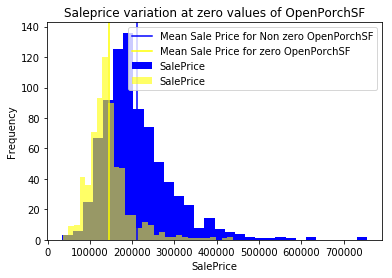

In [21]:
#Histogram of SalePrice to see impact of zero values in 'OpenPorchSF'
train[train['OpenPorchSF']!=0]['SalePrice'].plot.hist( bins=30, color= 'blue')
plt.axvline(train[train['OpenPorchSF']!=0]['SalePrice'].mean(),color= 'blue', label='Mean Sale Price for Non zero OpenPorchSF')
train[train['OpenPorchSF']==0]['SalePrice'].plot.hist( bins=30, color='yellow',alpha=.6)
plt.axvline(train[train['OpenPorchSF']==0]['SalePrice'].mean(),color= 'yellow', label='Mean Sale Price for zero OpenPorchSF')
plt.xlabel('SalePrice')
plt.title('Saleprice variation at zero values of OpenPorchSF')
plt.legend()

Average SalePrice is much lower where OpenPorchSF is not present

Now how do we treat the Nan and zero values. 
Observation:
Nan values are not very high in numbers.As far as zero values are concerned, mean SalePrice differs when a numerical feature is not present in some variables.  
1. We create a seperate variable for each numerical column and label the absence of feature i.e 0 value as 1, and presence of a feature as 0. 
2. We replace zero's with Nan and interpolate the variable by linear method using the interpolate method.

In [22]:
# Creating seperate columns indicating absence or presence of a numerical featrue.
for col in numcollist:
    if 0 in train[col].values:
        #print(col)
        train['zero'+col]=np.where(train[col]==0,1,0)
        categlist.append('zero'+col)

In [23]:
# Nan Imputation
train[numcollist]=train[numcollist].replace(0, np.nan).interpolate(kind='linear',limit_direction='both')

## Outliers

Lets take a look at the distribution of 'SalePrice' to identify outliers.

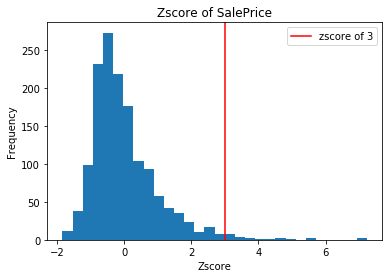

In [24]:
# We derive zscore and plot its histogram.
train['zscore']=(train['SalePrice']-train['SalePrice'].mean())/train['SalePrice'].std()
plt.hist(train['zscore'], bins=30)
plt.axvline(x=3, color = 'red', label='zscore of 3')
plt.xlabel('Zscore')
plt.ylabel('Frequency')
plt.title('Zscore of SalePrice')
plt.legend()

In [25]:
points=len(train[train['zscore']>=3])
print('{} number of SalePrice points are outliers'.format(points))

22 number of SalePrice points are outliers


Let's further take a look at how SalePrice points behave with a correlated variable.

In [26]:
#Calculate correlation coefficients of variables eith SalePrice.
train[numcollist].corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
GrLivArea      0.708624
1stFlrSF       0.605852
TotalBsmtSF    0.597630
GarageArea     0.582196
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Relation between SalePrice and GrLivArea')

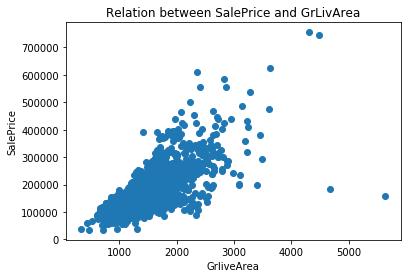

In [27]:
# Select GrLivArea and plot scatter plot
plt.scatter(x='GrLivArea', y='SalePrice' ,data=train)
plt.xlabel('GrliveArea')
plt.ylabel('SalePrice')
plt.title('Relation between SalePrice and GrLivArea')

Observations:
1. There are 22 values above zscore of 3.
2. Before taking a decision to remove or transform these outliers we looked at the linear relationship between Sale Price and GrLivArea.
3. Out of these 22 values most of the values are following a linear trend with GrLiveArea.But these values are high. If we normalize the data, this could be taken care of. However 2 points at bottom right are not following the trend. So these 2 points are outliers.

In [28]:
for col in numcollist:
    print(col, end=' , ')

LotFrontage , LotArea , MasVnrArea , BsmtFinSF1 , BsmtFinSF2 , BsmtUnfSF , TotalBsmtSF , 1stFlrSF , 2ndFlrSF , LowQualFinSF , GrLivArea , GarageArea , WoodDeckSF , OpenPorchSF , EnclosedPorch , 3SsnPorch , ScreenPorch , MiscVal , SalePrice , 

In [29]:
for col in categlist:
    print(col, end=' , ')

MSZoning , Street , Alley , LotShape , LandContour , Utilities , LotConfig , LandSlope , Neighborhood , Condition1 , Condition2 , BldgType , HouseStyle , RoofStyle , RoofMatl , Exterior1st , Exterior2nd , MasVnrType , ExterQual , ExterCond , Foundation , BsmtQual , BsmtCond , BsmtExposure , BsmtFinType1 , BsmtFinType2 , Heating , HeatingQC , CentralAir , Electrical , KitchenQual , Functional , FireplaceQu , GarageType , GarageFinish , GarageQual , GarageCond , PavedDrive , PoolQC , Fence , MiscFeature , SaleType , SaleCondition , MSSubClass , OverallQual , OverallCond , BsmtFullBath , BsmtHalfBath , FullBath , HalfBath , BedroomAbvGr , KitchenAbvGr , TotRmsAbvGrd , Fireplaces , GarageCars , PoolArea , MoSold , YrSold , YearBuilt , YearRemodAdd , GarageYrBlt , zeroMasVnrArea , zeroBsmtFinSF1 , zeroBsmtFinSF2 , zeroBsmtUnfSF , zeroTotalBsmtSF , zero2ndFlrSF , zeroLowQualFinSF , zeroGarageArea , zeroWoodDeckSF , zeroOpenPorchSF , zeroEnclosedPorch , zero3SsnPorch , zeroScreenPorch , zeroM